In [3]:
import tensorflow as tf


In [4]:
print(tf.__version__)

2.19.0


In [22]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing the dataset

dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
# Dividing the dataset into independent and dependent variables
x = dataset.iloc[:, 3:13] # not including the first 3 columns, as they are not required for the model
y = dataset.iloc[:, 13] # dependent variable

In [24]:
x.head

<bound method NDFrame.head of       CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  

In [26]:
# Feature Engineering
geography=pd.get_dummies(x["Geography"],drop_first=True)
gender=pd.get_dummies(x["Gender"],drop_first=True)

# Concatenating the dummy variables to the original dataframe
x=x.drop(columns=["Geography","Gender"],axis=1)
x=pd.concat([x,geography,gender],axis=1)
x.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [27]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [28]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)



In [32]:
x_train.shape

(8000, 11)

In [34]:
# Building the ANN

from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, PReLU, ELU, ReLU, Dropout


In [37]:
## Initialize the ANN
classifier = Sequential()
## Adding the input Layer : 11 inputs in the x_train
classifier.add(Dense(units=11, activation='relu'))

## Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))

## Adding the second hidden layer
classifier.add(Dense(units=6, activation='relu'))

## Adding the Output Layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [38]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [44]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.01)



In [48]:
# Early stopping keras
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [49]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8705 - loss: 0.3109 - val_accuracy: 0.8557 - val_loss: 0.3645
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8726 - loss: 0.3071 - val_accuracy: 0.8516 - val_loss: 0.3680
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8765 - loss: 0.3032 - val_accuracy: 0.8550 - val_loss: 0.3634
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8665 - loss: 0.3174 - val_accuracy: 0.8550 - val_loss: 0.3650
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8617 - loss: 0.3244 - val_accuracy: 0.8554 - val_loss: 0.3659
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8774 - loss: 0.2984 - val_accuracy: 0.8546 - val_loss: 0.3630
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8760 - loss: 0.3069 - val_accuracy: 0.8546 - val_loss: 0.3626
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8778 - loss: 0.3082 - 

In [54]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

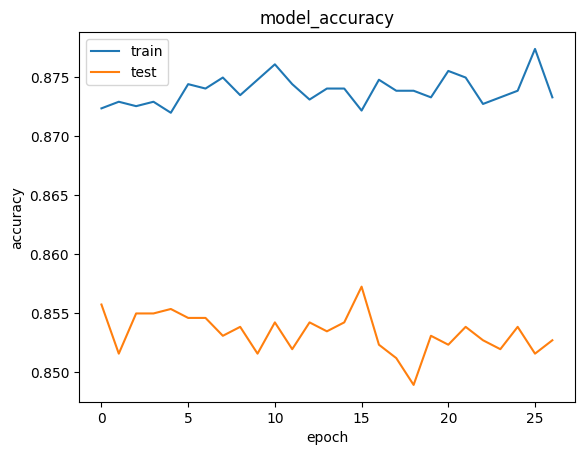

In [55]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

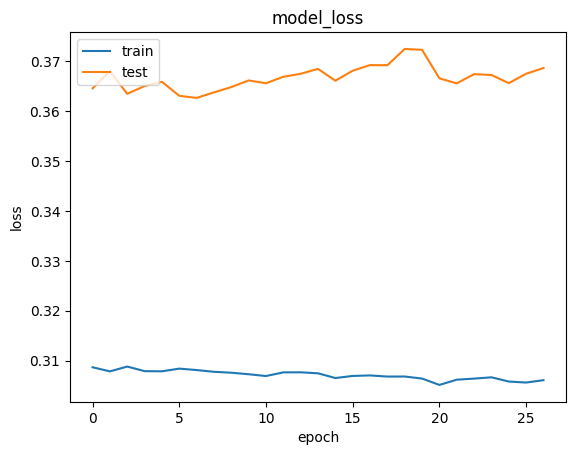

In [56]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [57]:
# Part 3 - Making the Predictions and Evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred >=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [58]:
## Make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1490,  105],
       [ 189,  216]])

In [59]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.853

In [60]:
## Get the weights and store as pickle file

classifier.get_weights()

[array([[ 0.65780574,  0.13035636,  0.18973157,  0.08967008,  0.1194542 ,
         -0.55314445,  0.78339535,  0.02817797,  0.4362572 ,  0.44827878,
         -0.12708193],
        [ 0.7014168 ,  1.0029423 , -0.29874438,  0.51454955,  1.0430956 ,
          0.48681435, -0.644819  , -0.30750507, -0.6935283 ,  0.68584776,
          0.2862723 ],
        [ 0.24738924, -0.36143705, -0.40985584, -0.47721732,  0.11569313,
          0.23788458,  0.5275417 ,  0.12965128,  0.06028403,  0.14010544,
         -0.12054727],
        [ 0.14367804,  0.5696184 ,  0.0564907 , -0.00865858, -0.40790948,
         -0.68031543,  0.03771035, -0.2266698 , -0.71593523, -0.03393159,
         -0.5585541 ],
        [-0.7235483 ,  0.5606501 , -0.21955271,  0.18367758, -0.098435  ,
          0.00523681,  0.39431274,  1.0566453 , -0.25760588, -0.1534428 ,
         -1.0719177 ],
        [ 0.20830366, -0.0044909 ,  0.44193518,  0.46241188, -0.08861695,
         -0.7426435 , -0.5514318 ,  0.40366718,  0.19054937,  0.2598793